# 작업할 데이터 받기

In [1]:
df_ols = pd.read_csv('df_OLS.csv', encoding='utf-8-sig', index_col=0)

In [2]:
df_ols

,position,age,rating,value,follower,passes_total,passes_accuracy,tackles_total,tackles_blocks,tackles_interceptions,...,penalty_missed,games_lineups,games_played,hw,shotsOnTotal_goalsTotal,goasConceded_penaltySaved,goalsAssist_passesKey,duelsWonTotal,dribblesAtmptsSuc,gamesApperance_sub
0,2.000000,25.000000,2.333333,20.0,67879,22.1875,3.2985,1.2112,0.1417,0.8504,...,0.0000,0.9277,77.6111,-0.392274,-1.612784,-0.285146,-1.738633,-1.924682,-0.276160,2.236486
1,4.000000,27.000000,5.250000,32.0,740918,12.3211,4.0184,0.4629,0.0985,0.2659,...,0.0295,0.9947,101.5333,0.141002,1.822336,-0.285146,-0.383844,1.580211,-0.167363,-1.808610
2,3.000000,24.000000,6.000000,24.0,601838,58.0175,13.4528,1.0301,0.3802,1.3367,...,0.0000,1.0056,81.5444,-0.580321,-1.817034,-0.285146,-1.744717,-0.246207,-1.650098,0.163037
3,4.000000,25.000000,7.000000,32.0,652886,23.4897,9.1609,0.7758,0.1141,0.9355,...,0.0000,0.9697,87.6556,0.741866,0.551484,-0.285146,1.006489,1.352523,2.219212,4.054520
4,2.000000,32.000000,4.833333,32.0,11513791,32.2437,6.1453,0.4321,0.0480,0.4225,...,0.0096,1.0754,104.1444,-0.008107,2.104335,-0.285146,2.797874,-1.700012,0.984943,0.382540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,4.000000,28.000000,3.888889,44.0,1028085,21.4995,4.2611,1.1758,0.0216,0.3452,...,0.0000,0.9924,92.7000,0.580254,0.448326,-0.285146,0.257094,3.975849,4.594321,-2.079535
367,3.769231,23.076923,1.615385,24.0,57900,4.1158,2.3642,0.1397,0.0215,0.0430,...,0.0107,1.0531,93.0556,-1.164444,-0.497805,-0.285146,-1.725265,-2.941022,-1.572458,0.538228
368,4.000000,32.000000,6.153846,22.5,8983450,38.4786,8.6552,0.7696,0.0300,0.5297,...,0.0000,1.0294,100.0556,0.096205,1.152975,-0.285146,2.862916,0.141037,2.276803,2.749932
369,4.000000,26.000000,6.545455,24.0,109000,16.8656,7.4315,0.3936,0.0695,0.3010,...,0.0000,0.9492,86.3889,-1.160608,0.759456,-0.285146,1.050869,2.395041,-0.209080,2.181788


# position 데이터 정리 - 반올림

In [3]:
df_ols.position.unique()

array([2.        , 4.        , 3.        , 1.        , 3.33333333,
       1.84615385, 3.43478261, 1.09090909, 3.29411765, 2.56818182,
       2.25      , 2.4       , 3.75      , 3.2       , 1.66666667,
       2.16666667, 2.91304348, 2.63636364, 3.76923077])

In [4]:
df_ols.position = df_ols.position.round()

In [5]:
df_ols.position.unique()

array([2., 4., 3., 1.])

# 아웃라이어 확인

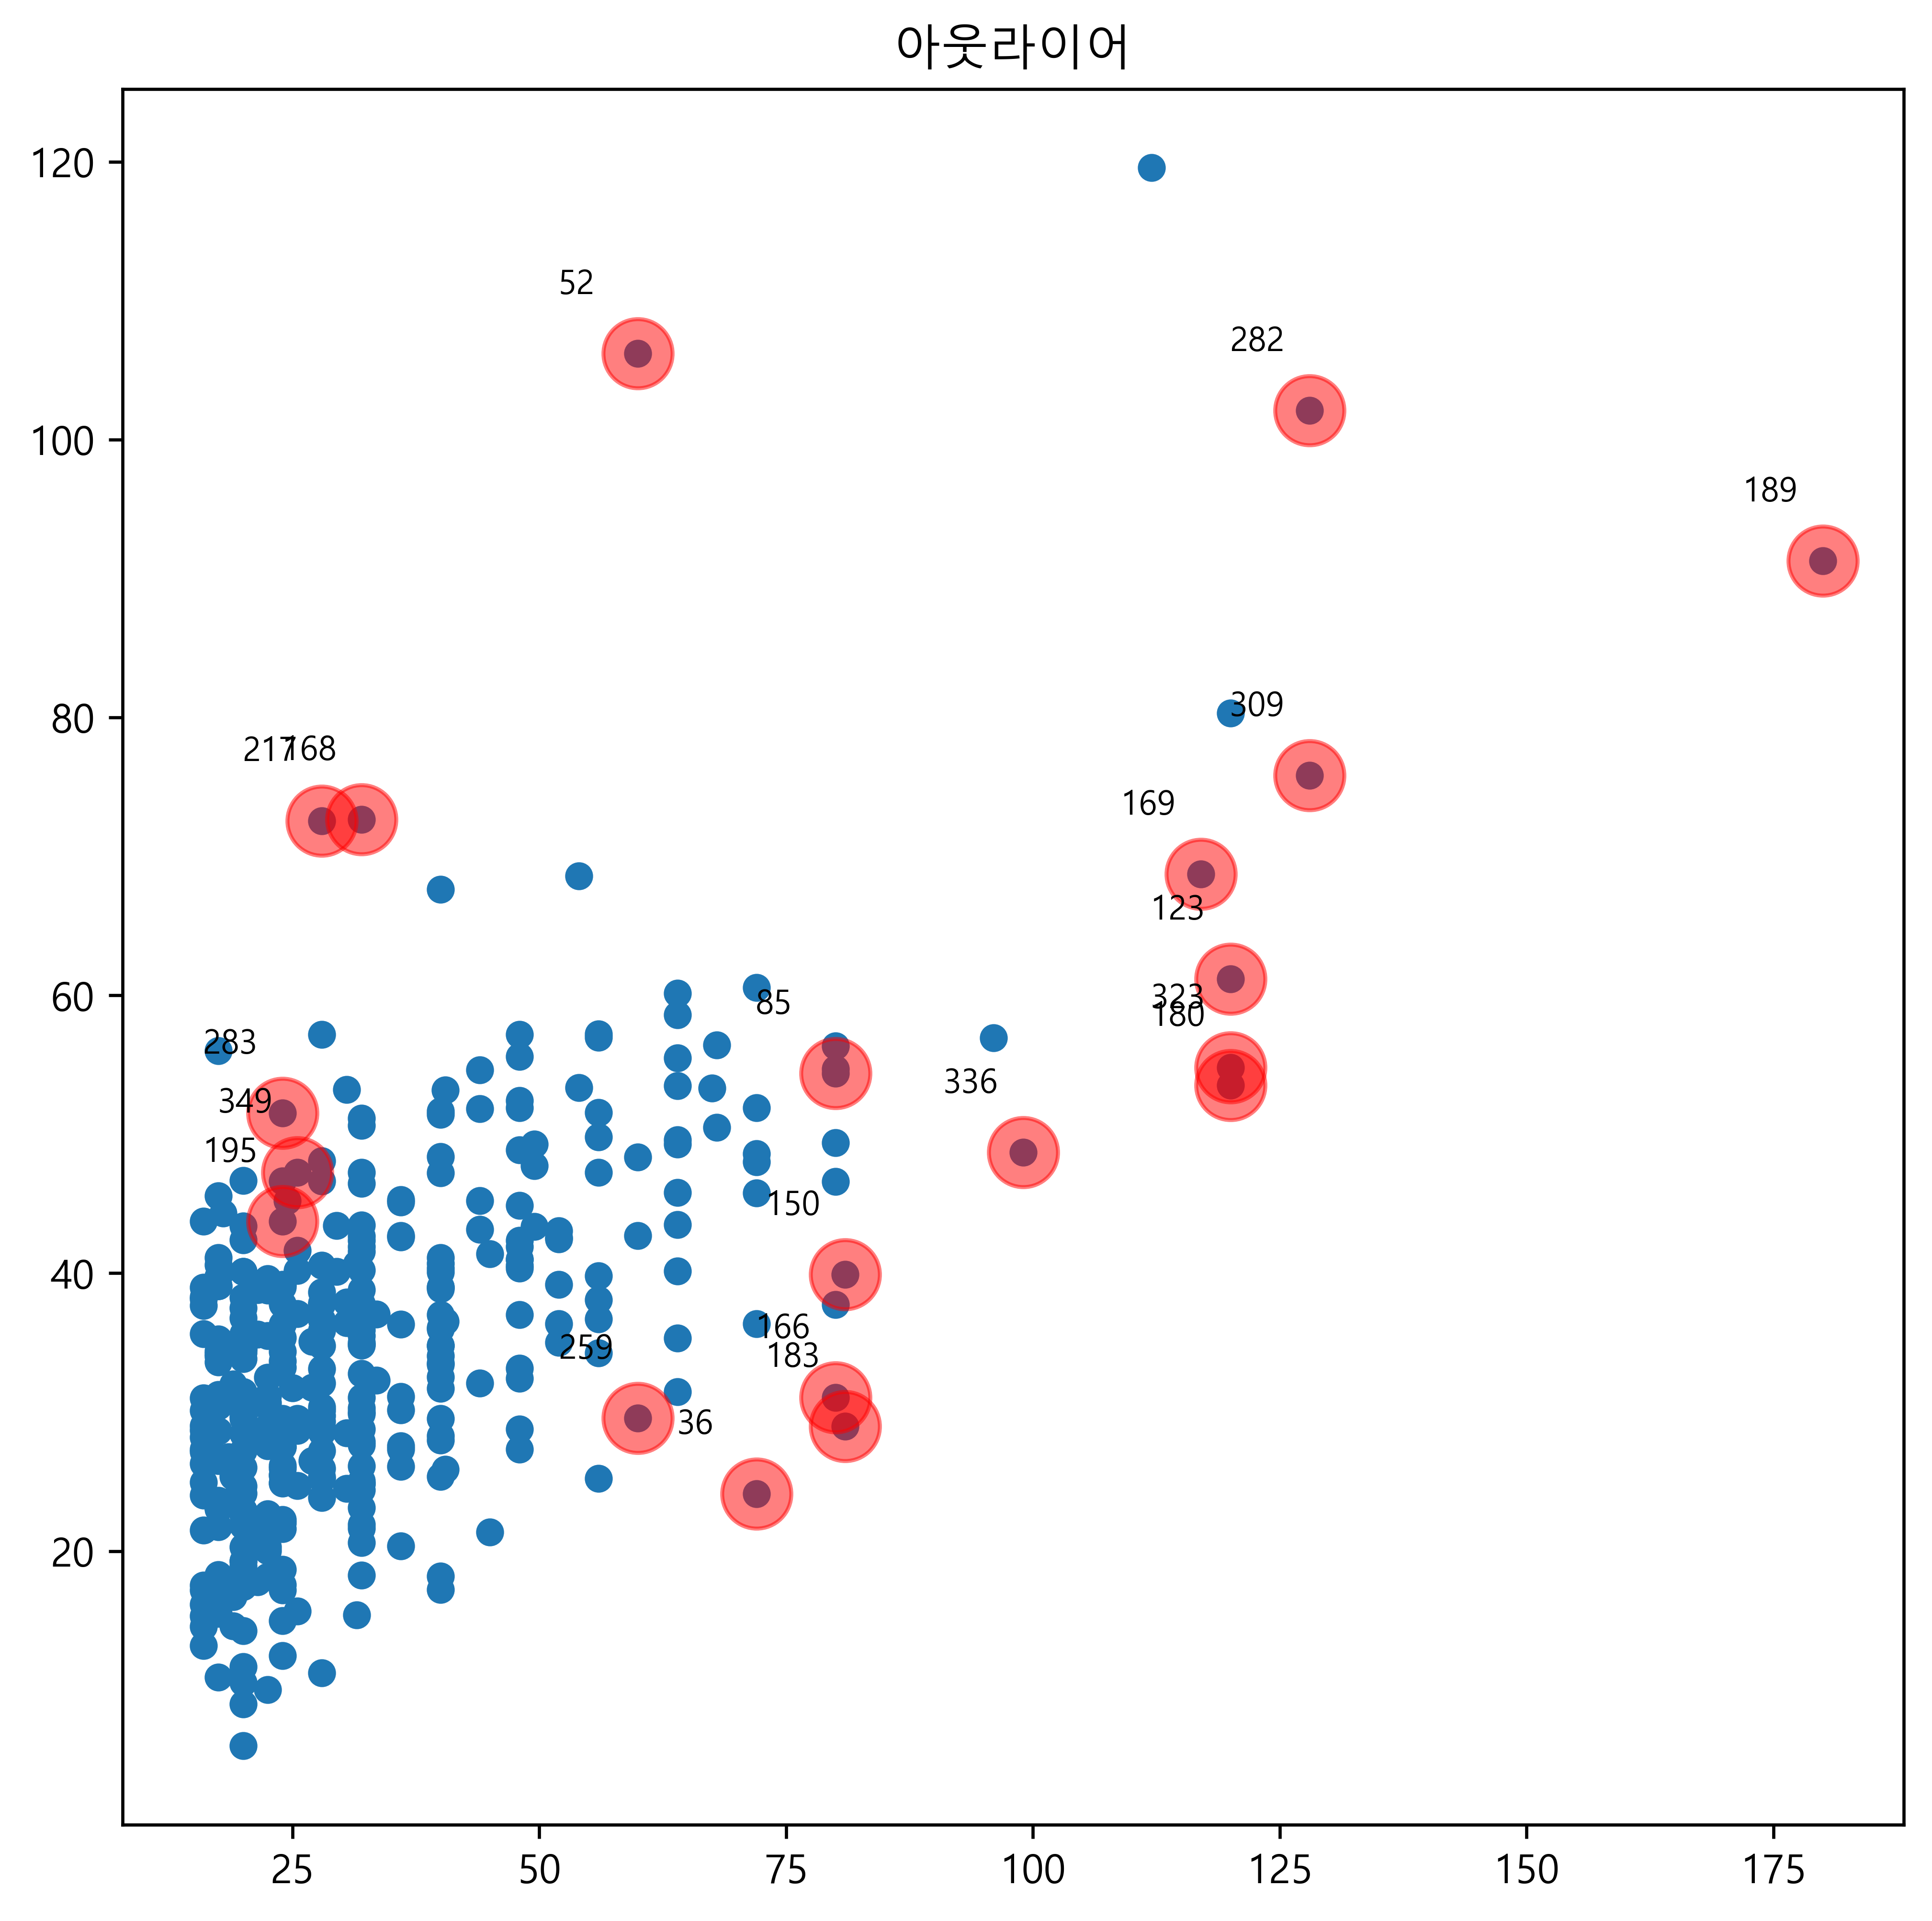

[ 36  52  85 123 150 166 168 169 180 183 189 195 217 259 282 283 309 323
 336 349]


In [6]:
from statsmodels.graphics import utils

dfX0 = df_ols.drop('value', axis=1)
dfX = sm.add_constant(dfX0)
dfy = df_ols['value']

model_p = sm.OLS(dfy, dfX)
result_p = model_p.fit()
pred = result_p.predict(dfX)

influence_p = result_p.get_influence()
cooks_d2, pvals = influence_p.cooks_distance
K = influence_p.k_vars
fox_cr = 4 / (len(dfy) - K - 1)
idx = np.where(cooks_d2 > fox_cr)[0]

ax = plt.subplot()
plt.scatter(dfy, pred)
plt.scatter(dfy[idx], pred[idx], s=300, c="r", alpha=0.5)
utils.annotate_axes(range(len(idx)), idx, list(zip(dfy[idx], pred[idx])), [(-20, 15)] * len(idx), size="small", ax=ax)
plt.title("아웃라이어")
plt.show()
print(idx)

# 아웃라이어 제거

In [7]:
idx2 = list(set(range(len(dfX))).difference(idx))
df_out = df_ols.iloc[idx2].reset_index(drop=True)

# 아웃라이어 제거 후, OLS with Position Categorized

In [8]:
from sklearn.model_selection import train_test_split

dfX = df_out.drop(['value'], axis=1)
dfy = df_out['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.drop(['position'], axis=1).columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ C(position) + " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     6.397
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           8.90e-17
Time:                        18:25:02   Log-Likelihood:                -941.27
No. Observations:                 245   AIC:                             1943.
Df Residuals:                     215   BIC:                             2048.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [9]:
pred = result.predict(df_test)

rss = ((df_test.value - pred) ** 2).sum()
tss = ((df_test.value - df_test.value.mean()) ** 2).sum()
rsquared = 1 - rss / tss
rsquared

0.4016902445970141

# VIF Factor 확인

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfX.values, i) for i in range(dfX.shape[1])]
vif["features"] = dfX.columns
vif.sort_values(by='VIF Factor', ascending=False)

`다른 변수에 의존적일 수록 VIF가 커진다.`

가장 VIF가 큰 feature들은 아래와 같다.

VIF | Factor | features
---|---|---
19 | 189.332686 |	games_lineups
1 | 116.897291 |	age
20 | 49.140535 |	games_played
4 | 49.007109 |	goals_assists
2 | 42.252726 |	rating


하지만 위 5개 feature들은 모두 중요한 feature들로 제거할 수 없기에 VIF Factor는 무시하기로 했다.

# P값 큰 feature 제거 - 1차

In [ ]:
df_out_1 = df_out.drop(['tackles_total', 'cards_yellowred'], axis=1)
len(df_out.columns), len(df_out_1.columns)

In [ ]:
from sklearn.model_selection import train_test_split

dfX = df_out_1.drop(['value'], axis=1)
dfy = df_out_1['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.drop(['position'], axis=1).columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ C(position) + " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

In [ ]:
pred = result.predict(df_test)

rss = ((df_test.value - pred) ** 2).sum()
tss = ((df_test.value - df_test.value.mean()) ** 2).sum()
rsquared = 1 - rss / tss
rsquared

# P값 큰 feature 제거 - 2차

In [ ]:
df_out_2 = df_out_1.drop(['rating', 'tackles_interceptions', 'penalty_commited'], axis=1)
len(df_out_1.columns), len(df_out_2.columns)

In [ ]:
from sklearn.model_selection import train_test_split

dfX = df_out_2.drop(['value'], axis=1)
dfy = df_out_2['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.drop(['position'], axis=1).columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ C(position) + " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

In [ ]:
pred = result.predict(df_test)

rss = ((df_test.value - pred) ** 2).sum()
tss = ((df_test.value - df_test.value.mean()) ** 2).sum()
rsquared = 1 - rss / tss
rsquared

# P값 큰 feature 제거 - 3차

In [ ]:
df_out_3 = df_out_2.drop(['cards_yellow'], axis=1)
len(df_out_2.columns), len(df_out_3.columns)

In [ ]:
from sklearn.model_selection import train_test_split

dfX = df_out_3.drop(['value'], axis=1)
dfy = df_out_3['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.drop(['position'], axis=1).columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ C(position) + " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

In [ ]:
pred = result.predict(df_test)

rss = ((df_test.value - pred) ** 2).sum()
tss = ((df_test.value - df_test.value.mean()) ** 2).sum()
rsquared = 1 - rss / tss
rsquared

# P값 큰 feature 제거 - 4차

In [ ]:
df_out_4 = df_out_3.drop(['duelsWonTotal', 'fouls_committed'], axis=1)
len(df_out_3.columns), len(df_out_4.columns)

In [ ]:
from sklearn.model_selection import train_test_split

dfX = df_out_4.drop(['value'], axis=1)
dfy = df_out_4['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.drop(['position'], axis=1).columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ C(position) + " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

In [ ]:
pred = result.predict(df_test)

rss = ((df_test.value - pred) ** 2).sum()
tss = ((df_test.value - df_test.value.mean()) ** 2).sum()
rsquared = 1 - rss / tss
rsquared

# P값 큰 feature 제거 - 5차

In [ ]:
df_out_5 = df_out_4.drop(['cards_red', 'goalsAssist_passesKey'], axis=1)
len(df_out_4.columns), len(df_out_5.columns)

In [ ]:
from sklearn.model_selection import train_test_split

dfX = df_out_5.drop(['value'], axis=1)
dfy = df_out_5['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.drop(['position'], axis=1).columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ C(position) + " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

In [ ]:
pred = result.predict(df_test)

rss = ((df_test.value - pred) ** 2).sum()
tss = ((df_test.value - df_test.value.mean()) ** 2).sum()
rsquared = 1 - rss / tss
rsquared

# P값 큰 feature 제거 - 6차

In [ ]:
df_out_6 = df_out_5.drop(['tackles_blocks'], axis=1)
len(df_out_5.columns), len(df_out_6.columns)

In [ ]:
from sklearn.model_selection import train_test_split

dfX = df_out_6.drop(['value'], axis=1)
dfy = df_out_6['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.drop(['position'], axis=1).columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ C(position) + " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

pred = result.predict(df_test)

rss = ((df_test.value - pred) ** 2).sum()
tss = ((df_test.value - df_test.value.mean()) ** 2).sum()
rsquared = 1 - rss / tss
rsquared

# P값 큰 feature 제거 - 7차

In [ ]:
df_out_7 = df_out_6.drop(['hw'], axis=1)
len(df_out_6.columns), len(df_out_7.columns)

In [ ]:
from sklearn.model_selection import train_test_split

dfX = df_out_7.drop(['value'], axis=1)
dfy = df_out_7['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.drop(['position'], axis=1).columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ C(position) + " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

pred = result.predict(df_test)

rss = ((df_test.value - pred) ** 2).sum()
tss = ((df_test.value - df_test.value.mean()) ** 2).sum()
rsquared = 1 - rss / tss
rsquared

# P값 큰 feature 제거 - 8차

In [ ]:
df_out_8 = df_out_7.drop(['penalty_missed'], axis=1)
len(df_out_7.columns), len(df_out_8.columns)

In [ ]:
from sklearn.model_selection import train_test_split

dfX = df_out_8.drop(['value'], axis=1)
dfy = df_out_8['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.drop(['position'], axis=1).columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ C(position) + " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

pred = result.predict(df_test)

rss = ((df_test.value - pred) ** 2).sum()
tss = ((df_test.value - df_test.value.mean()) ** 2).sum()
rsquared = 1 - rss / tss
rsquared

# P값 큰 feature 제거 - 9차

In [ ]:
df_out_9 = df_out_8.drop(['penalty_success', 'penalty_won'], axis=1)
len(df_out_8.columns), len(df_out_9.columns)

In [ ]:
from sklearn.model_selection import train_test_split

dfX = df_out_9.drop(['value'], axis=1)
dfy = df_out_9['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.drop(['position'], axis=1).columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ C(position) + " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

pred = result.predict(df_test)

rss = ((df_test.value - pred) ** 2).sum()
tss = ((df_test.value - df_test.value.mean()) ** 2).sum()
rsquared = 1 - rss / tss
rsquared

# P값 큰 feature 제거 - 10차

In [ ]:
df_out_10 = df_out_9.drop(['goasConceded_penaltySaved'], axis=1)
len(df_out_9.columns), len(df_out_10.columns)

In [ ]:
from sklearn.model_selection import train_test_split

dfX = df_out_10.drop(['value'], axis=1)
dfy = df_out_10['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.drop(['position'], axis=1).columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ C(position) + " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

pred = result.predict(df_test)

rss = ((df_test.value - pred) ** 2).sum()
tss = ((df_test.value - df_test.value.mean()) ** 2).sum()
rsquared = 1 - rss / tss
rsquared

# P값 큰 feature 제거 - 11차

In [ ]:
df_out_11 = df_out_10.drop(['games_lineups'], axis=1)
len(df_out_10.columns), len(df_out_11.columns)

In [ ]:
from sklearn.model_selection import train_test_split

dfX = df_out_11.drop(['value'], axis=1)
dfy = df_out_11['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.drop(['position'], axis=1).columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ C(position) + " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

pred = result.predict(df_test)

rss = ((df_test.value - pred) ** 2).sum()
tss = ((df_test.value - df_test.value.mean()) ** 2).sum()
rsquared = 1 - rss / tss
rsquared

# P값 큰 feature 제거 - 12차

In [ ]:
df_out_12 = df_out_11.drop(['gamesApperance_sub'], axis=1)
len(df_out_11.columns), len(df_out_12.columns)

In [ ]:
from sklearn.model_selection import train_test_split

dfX = df_out_12.drop(['value'], axis=1)
dfy = df_out_12['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.drop(['position'], axis=1).columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ C(position) + " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

pred = result.predict(df_test)

rss = ((df_test.value - pred) ** 2).sum()
tss = ((df_test.value - df_test.value.mean()) ** 2).sum()
rsquared = 1 - rss / tss
rsquared

# P값 큰 feature 제거 - 13차

In [ ]:
df_out_13 = df_out_12.drop(['dribblesAtmptsSuc'], axis=1)
len(df_out_12.columns), len(df_out_13.columns)

In [ ]:
from sklearn.model_selection import train_test_split

dfX = df_out_13.drop(['value'], axis=1)
dfy = df_out_13['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.drop(['position'], axis=1).columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ C(position) + " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

pred = result.predict(df_test)

rss = ((df_test.value - pred) ** 2).sum()
tss = ((df_test.value - df_test.value.mean()) ** 2).sum()
rsquared = 1 - rss / tss
rsquared

# P값 큰 feature 제거 - 14차

In [ ]:
df_out_14 = df_out_13.drop(['fouls_drawn'], axis=1)
len(df_out_13.columns), len(df_out_14.columns)

In [ ]:
from sklearn.model_selection import train_test_split

dfX = df_out_14.drop(['value'], axis=1)
dfy = df_out_14['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.drop(['position'], axis=1).columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ C(position) + " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

pred = result.predict(df_test)

rss = ((df_test.value - pred) ** 2).sum()
tss = ((df_test.value - df_test.value.mean()) ** 2).sum()
rsquared = 1 - rss / tss
rsquared

# Position 제거 후, OLS

In [ ]:
df_out_15 = df_out_14.drop(['position'], axis=1)
len(df_out_14.columns), len(df_out_15.columns)

In [ ]:
from sklearn.model_selection import train_test_split

dfX = df_out_15.drop(['value'], axis=1)
dfy = df_out_15['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

pred = result.predict(df_test)

rss = ((df_test.value - pred) ** 2).sum()
tss = ((df_test.value - df_test.value.mean()) ** 2).sum()
rsquared = 1 - rss / tss
rsquared

# P값 큰 feature 제거 - 16차

In [ ]:
df_out_16 = df_out_15.drop(['passes_total'], axis=1)
len(df_out_15.columns), len(df_out_16.columns)

In [ ]:
from sklearn.model_selection import train_test_split

dfX = df_out_16.drop(['value'], axis=1)
dfy = df_out_16['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

pred = result.predict(df_test)

rss = ((df_test.value - pred) ** 2).sum()
tss = ((df_test.value - df_test.value.mean()) ** 2).sum()
rsquared = 1 - rss / tss
rsquared

# 검증 1차

In [ ]:
from sklearn.model_selection import KFold

scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df_out_16)):
    df_train = df_out_16.iloc[idx_train]
    df_test = df_out_16.iloc[idx_test]
    
    model = sm.OLS.from_formula("value ~ scale(age) + scale(follower) + scale(passes_accuracy) + \
                                scale(games_played) + scale(shotsOnTotal_goalsTotal)", data=df_train)
    result = model.fit()
    
    pred = result.predict(df_test)
    rss = ((df_test.value - pred) ** 2).sum()
    tss = ((df_test.value - df_test.value.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))

# 검증 2차

In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin
import statsmodels.formula.api as smf
import statsmodels.api as sm

class StatsmodelsOLS(BaseEstimator, RegressorMixin):
    def __init__(self, formula):
        self.formula = formula
        self.model = None
        self.data = None
        self.result = None
        
    def fit(self, dfX, dfy):
        self.data = pd.concat([dfX, dfy], axis=1)
        self.model = smf.ols(self.formula, data=self.data)
        self.result = self.model.fit()
        
    def predict(self, new_data):
        return self.result.predict(new_data)

In [ ]:
from sklearn.model_selection import cross_val_score

model = StatsmodelsOLS("value ~ scale(age) + scale(follower) + scale(passes_accuracy) + \
                                scale(games_played) + scale(shotsOnTotal_goalsTotal)")
cv = KFold(10, shuffle=True, random_state=0)
cross_val_score(model, dfX, dfy, scoring="r2", cv=cv).mean()

# 아웃라이어 먼저 제거 후, OLS

In [10]:
from sklearn.model_selection import train_test_split

dfX = df_out.drop(['value'], axis=1)
dfy = df_out['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

pred = result.predict(df_test)

rss = ((df_test.value - pred) ** 2).sum()
tss = ((df_test.value - df_test.value.mean()) ** 2).sum()
rsquared = 1 - rss / tss
rsquared

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     6.675
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           6.57e-17
Time:                        18:25:43   Log-Likelihood:                -943.41
No. Observations:                 245   AIC:                             1943.
Df Residuals:                     217   BIC:                             2041.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

0.428758806890296

# VIF Factor 확인

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfX.values, i) for i in range(dfX.shape[1])]
vif["features"] = dfX.columns
vif.sort_values(by='VIF Factor', ascending=False)

,VIF Factor,features
18,168.340850,games_lineups
1,114.777359,age
19,48.141862,games_played
2,41.385453,rating
5,28.546988,passes_accuracy
0,21.820481,position
10,18.356539,fouls_committed
4,17.160414,passes_total
8,13.108061,tackles_interceptions
11,10.571770,cards_yellow


# 큰 P값 feature 제거 - 1차

In [12]:
df_out_1 = df_out.drop(['cards_yellowred', 'penalty_commited', 'tackles_total'], axis=1)
len(df_out.columns), len(df_out_1.columns)

(28, 25)

In [58]:
from sklearn.model_selection import train_test_split

dfX = df_out_1.drop(['value'], axis=1)
dfy = df_out_1['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

##############################################################################
from sklearn.model_selection import KFold

scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df_ols)):
    df_train = df_ols.iloc[idx_train]
    df_test = df_ols.iloc[idx_test]
    
    model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
    result = model.fit()
    
    pred = result.predict(df_test)
    rss = ((df_test.value - pred) ** 2).sum()
    tss = ((df_test.value - df_test.value.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
#    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))
print("모델 성능 : {}".format(scores.mean()))

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     7.613
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           3.18e-18
Time:                        18:29:33   Log-Likelihood:                -943.41
No. Observations:                 245   AIC:                             1937.
Df Residuals:                     220   BIC:                             2024.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

# 큰 P값 feature 제거 - 2차

In [14]:
df_out_2 = df_out_1.drop(['rating'], axis=1)
len(df_out_1.columns), len(df_out_2.columns)

(25, 24)

In [59]:
from sklearn.model_selection import train_test_split

dfX = df_out_2.drop(['value'], axis=1)
dfy = df_out_2['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

##############################################################################
from sklearn.model_selection import KFold

scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df_ols)):
    df_train = df_ols.iloc[idx_train]
    df_test = df_ols.iloc[idx_test]
    
    model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
    result = model.fit()
    
    pred = result.predict(df_test)
    rss = ((df_test.value - pred) ** 2).sum()
    tss = ((df_test.value - df_test.value.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
#    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))
print("모델 성능 : {}".format(scores.mean()))

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     7.977
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           1.12e-18
Time:                        18:29:49   Log-Likelihood:                -943.44
No. Observations:                 245   AIC:                             1935.
Df Residuals:                     221   BIC:                             2019.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

# 큰 P값 feature 제거 - 3차

In [16]:
df_out_3 = df_out_2.drop(['tackles_interceptions'], axis=1)
len(df_out_2.columns), len(df_out_3.columns)

(24, 23)

In [60]:
from sklearn.model_selection import train_test_split

dfX = df_out_3.drop(['value'], axis=1)
dfy = df_out_3['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

##############################################################################
from sklearn.model_selection import KFold

scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df_ols)):
    df_train = df_ols.iloc[idx_train]
    df_test = df_ols.iloc[idx_test]
    
    model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
    result = model.fit()
    
    pred = result.predict(df_test)
    rss = ((df_test.value - pred) ** 2).sum()
    tss = ((df_test.value - df_test.value.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
#    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))
print("모델 성능 : {}".format(scores.mean()))

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     8.373
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           3.90e-19
Time:                        18:30:04   Log-Likelihood:                -943.47
No. Observations:                 245   AIC:                             1933.
Df Residuals:                     222   BIC:                             2013.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

# 큰 P값 feature 제거 - 4차

In [18]:
df_out_4 = df_out_3.drop(['hw'], axis=1)
len(df_out_3.columns), len(df_out_4.columns)

(23, 22)

In [61]:
from sklearn.model_selection import train_test_split

dfX = df_out_4.drop(['value'], axis=1)
dfy = df_out_4['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

##############################################################################
from sklearn.model_selection import KFold

scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df_ols)):
    df_train = df_ols.iloc[idx_train]
    df_test = df_ols.iloc[idx_test]
    
    model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
    result = model.fit()
    
    pred = result.predict(df_test)
    rss = ((df_test.value - pred) ** 2).sum()
    tss = ((df_test.value - df_test.value.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
#    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))
print("모델 성능 : {}".format(scores.mean()))

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     8.772
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           1.58e-19
Time:                        18:30:14   Log-Likelihood:                -943.71
No. Observations:                 245   AIC:                             1931.
Df Residuals:                     223   BIC:                             2008.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

# 큰 P값 feature 제거 - 5차

In [20]:
df_out_5 = df_out_4.drop(['position'], axis=1)
len(df_out_4.columns), len(df_out_5.columns)

(22, 21)

In [62]:
from sklearn.model_selection import train_test_split

dfX = df_out_5.drop(['value'], axis=1)
dfy = df_out_5['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

##############################################################################
from sklearn.model_selection import KFold

scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df_ols)):
    df_train = df_ols.iloc[idx_train]
    df_test = df_ols.iloc[idx_test]
    
    model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
    result = model.fit()
    
    pred = result.predict(df_test)
    rss = ((df_test.value - pred) ** 2).sum()
    tss = ((df_test.value - df_test.value.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
#    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))
print("모델 성능 : {}".format(scores.mean()))

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     9.214
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           6.15e-20
Time:                        18:30:23   Log-Likelihood:                -943.94
No. Observations:                 245   AIC:                             1930.
Df Residuals:                     224   BIC:                             2003.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

# 큰 P값 feature 제거 - 6차

In [22]:
df_out_6 = df_out_5.drop(['cards_yellow'], axis=1)
len(df_out_5.columns), len(df_out_6.columns)

(21, 20)

In [63]:
from sklearn.model_selection import train_test_split

dfX = df_out_6.drop(['value'], axis=1)
dfy = df_out_6['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

##############################################################################
from sklearn.model_selection import KFold

scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df_ols)):
    df_train = df_ols.iloc[idx_train]
    df_test = df_ols.iloc[idx_test]
    
    model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
    result = model.fit()
    
    pred = result.predict(df_test)
    rss = ((df_test.value - pred) ** 2).sum()
    tss = ((df_test.value - df_test.value.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
#    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))
print("모델 성능 : {}".format(scores.mean()))

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     9.682
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           2.56e-20
Time:                        18:30:30   Log-Likelihood:                -944.28
No. Observations:                 245   AIC:                             1929.
Df Residuals:                     225   BIC:                             1999.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

# 큰 P값 feature 제거 - 7차

In [24]:
df_out_7 = df_out_6.drop(['fouls_committed'], axis=1)
len(df_out_6.columns), len(df_out_7.columns)

(20, 19)

In [64]:
from sklearn.model_selection import train_test_split

dfX = df_out_7.drop(['value'], axis=1)
dfy = df_out_7['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

##############################################################################
from sklearn.model_selection import KFold

scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df_ols)):
    df_train = df_ols.iloc[idx_train]
    df_test = df_ols.iloc[idx_test]
    
    model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
    result = model.fit()
    
    pred = result.predict(df_test)
    rss = ((df_test.value - pred) ** 2).sum()
    tss = ((df_test.value - df_test.value.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
#    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))
print("모델 성능 : {}".format(scores.mean()))

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     10.22
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           9.43e-21
Time:                        18:30:40   Log-Likelihood:                -944.50
No. Observations:                 245   AIC:                             1927.
Df Residuals:                     226   BIC:                             1994.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

# 큰 P값 feature 제거 - 8차

In [26]:
df_out_8 = df_out_7.drop(['cards_red'], axis=1)
len(df_out_7.columns), len(df_out_8.columns)

(19, 18)

In [65]:
from sklearn.model_selection import train_test_split

dfX = df_out_8.drop(['value'], axis=1)
dfy = df_out_8['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

##############################################################################
from sklearn.model_selection import KFold

scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df_ols)):
    df_train = df_ols.iloc[idx_train]
    df_test = df_ols.iloc[idx_test]
    
    model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
    result = model.fit()
    
    pred = result.predict(df_test)
    rss = ((df_test.value - pred) ** 2).sum()
    tss = ((df_test.value - df_test.value.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
#    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))
print("모델 성능 : {}".format(scores.mean()))

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     10.79
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           4.02e-21
Time:                        18:30:53   Log-Likelihood:                -944.93
No. Observations:                 245   AIC:                             1926.
Df Residuals:                     227   BIC:                             1989.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

# 큰 P값 feature 제거 - 9차

In [28]:
df_out_9 = df_out_8.drop(['duelsWonTotal'], axis=1)
len(df_out_8.columns), len(df_out_9.columns)

(18, 17)

In [66]:
from sklearn.model_selection import train_test_split

dfX = df_out_9.drop(['value'], axis=1)
dfy = df_out_9['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

##############################################################################
from sklearn.model_selection import KFold

scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df_ols)):
    df_train = df_ols.iloc[idx_train]
    df_test = df_ols.iloc[idx_test]
    
    model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
    result = model.fit()
    
    pred = result.predict(df_test)
    rss = ((df_test.value - pred) ** 2).sum()
    tss = ((df_test.value - df_test.value.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
#    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))
print("모델 성능 : {}".format(scores.mean()))

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     11.37
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           2.08e-21
Time:                        18:31:02   Log-Likelihood:                -945.61
No. Observations:                 245   AIC:                             1925.
Df Residuals:                     228   BIC:                             1985.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

# 큰 P값 feature 제거 - 10차

In [30]:
df_out_10 = df_out_9.drop(['penalty_won'], axis=1)
len(df_out_9.columns), len(df_out_10.columns)

(17, 16)

In [67]:
from sklearn.model_selection import train_test_split

dfX = df_out_10.drop(['value'], axis=1)
dfy = df_out_10['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

##############################################################################
from sklearn.model_selection import KFold

scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df_ols)):
    df_train = df_ols.iloc[idx_train]
    df_test = df_ols.iloc[idx_test]
    
    model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
    result = model.fit()
    
    pred = result.predict(df_test)
    rss = ((df_test.value - pred) ** 2).sum()
    tss = ((df_test.value - df_test.value.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
#    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))
print("모델 성능 : {}".format(scores.mean()))

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     11.98
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           1.29e-21
Time:                        18:31:17   Log-Likelihood:                -946.52
No. Observations:                 245   AIC:                             1925.
Df Residuals:                     229   BIC:                             1981.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

# 큰 P값 feature 제거 - 11차

In [32]:
df_out_11 = df_out_10.drop(['goasConceded_penaltySaved'], axis=1)
len(df_out_10.columns), len(df_out_11.columns)

(16, 15)

In [68]:
from sklearn.model_selection import train_test_split

dfX = df_out_11.drop(['value'], axis=1)
dfy = df_out_11['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

##############################################################################
from sklearn.model_selection import KFold

scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df_ols)):
    df_train = df_ols.iloc[idx_train]
    df_test = df_ols.iloc[idx_test]
    
    model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
    result = model.fit()
    
    pred = result.predict(df_test)
    rss = ((df_test.value - pred) ** 2).sum()
    tss = ((df_test.value - df_test.value.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
#    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))
print("모델 성능 : {}".format(scores.mean()))

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     12.68
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           7.57e-22
Time:                        18:31:25   Log-Likelihood:                -947.40
No. Observations:                 245   AIC:                             1925.
Df Residuals:                     230   BIC:                             1977.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

# 큰 P값 feature 제거 - 12차

In [34]:
df_out_12 = df_out_11.drop(['penalty_missed'], axis=1)
len(df_out_11.columns), len(df_out_12.columns)

(15, 14)

In [69]:
from sklearn.model_selection import train_test_split

dfX = df_out_12.drop(['value'], axis=1)
dfy = df_out_12['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

##############################################################################
from sklearn.model_selection import KFold

scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df_ols)):
    df_train = df_ols.iloc[idx_train]
    df_test = df_ols.iloc[idx_test]
    
    model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
    result = model.fit()
    
    pred = result.predict(df_test)
    rss = ((df_test.value - pred) ** 2).sum()
    tss = ((df_test.value - df_test.value.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
#    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))
print("모델 성능 : {}".format(scores.mean()))

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     13.42
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           5.54e-22
Time:                        18:31:51   Log-Likelihood:                -948.56
No. Observations:                 245   AIC:                             1925.
Df Residuals:                     231   BIC:                             1974.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

# 큰 P값 feature 제거 - 13차

In [36]:
df_out_13 = df_out_12.drop(['penalty_success'], axis=1)
len(df_out_12.columns), len(df_out_13.columns)

(14, 13)

In [70]:
from sklearn.model_selection import train_test_split

dfX = df_out_13.drop(['value'], axis=1)
dfy = df_out_13['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

##############################################################################
from sklearn.model_selection import KFold

scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df_ols)):
    df_train = df_ols.iloc[idx_train]
    df_test = df_ols.iloc[idx_test]
    
    model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
    result = model.fit()
    
    pred = result.predict(df_test)
    rss = ((df_test.value - pred) ** 2).sum()
    tss = ((df_test.value - df_test.value.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
#    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))
print("모델 성능 : {}".format(scores.mean()))

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     14.31
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           3.58e-22
Time:                        18:32:54   Log-Likelihood:                -949.60
No. Observations:                 245   AIC:                             1925.
Df Residuals:                     232   BIC:                             1971.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

# 큰 P값 feature 제거 - 14차

In [38]:
df_out_14 = df_out_13.drop(['goalsAssist_passesKey'], axis=1)
len(df_out_13.columns), len(df_out_14.columns)

(13, 12)

In [71]:
from sklearn.model_selection import train_test_split

dfX = df_out_14.drop(['value'], axis=1)
dfy = df_out_14['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

##############################################################################
from sklearn.model_selection import KFold

scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df_ols)):
    df_train = df_ols.iloc[idx_train]
    df_test = df_ols.iloc[idx_test]
    
    model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
    result = model.fit()
    
    pred = result.predict(df_test)
    rss = ((df_test.value - pred) ** 2).sum()
    tss = ((df_test.value - df_test.value.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
#    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))
print("모델 성능 : {}".format(scores.mean()))

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     15.26
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           3.12e-22
Time:                        18:33:39   Log-Likelihood:                -951.01
No. Observations:                 245   AIC:                             1926.
Df Residuals:                     233   BIC:                             1968.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

# 큰 P값 feature 제거 - 15차

In [40]:
df_out_15 = df_out_14.drop(['tackles_blocks'], axis=1)
len(df_out_14.columns), len(df_out_15.columns)

(12, 11)

In [72]:
from sklearn.model_selection import train_test_split

dfX = df_out_15.drop(['value'], axis=1)
dfy = df_out_15['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

##############################################################################
from sklearn.model_selection import KFold

scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df_ols)):
    df_train = df_ols.iloc[idx_train]
    df_test = df_ols.iloc[idx_test]
    
    model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
    result = model.fit()
    
    pred = result.predict(df_test)
    rss = ((df_test.value - pred) ** 2).sum()
    tss = ((df_test.value - df_test.value.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
#    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))
print("모델 성능 : {}".format(scores.mean()))

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     16.30
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           3.45e-22
Time:                        18:33:52   Log-Likelihood:                -952.71
No. Observations:                 245   AIC:                             1927.
Df Residuals:                     234   BIC:                             1966.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

# 15차 기준 전체 P값 0.05 미만
# 파일 하단에서 가중치 작업 진행

# 큰 P값 feature 제거 - 16차

In [42]:
df_out_16 = df_out_15.drop(['passes_total'], axis=1)
len(df_out_15.columns), len(df_out_16.columns)

(11, 10)

In [73]:
from sklearn.model_selection import train_test_split

dfX = df_out_16.drop(['value'], axis=1)
dfy = df_out_16['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

##############################################################################
from sklearn.model_selection import KFold

scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df_ols)):
    df_train = df_ols.iloc[idx_train]
    df_test = df_ols.iloc[idx_test]
    
    model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
    result = model.fit()
    
    pred = result.predict(df_test)
    rss = ((df_test.value - pred) ** 2).sum()
    tss = ((df_test.value - df_test.value.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
#    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))
print("모델 성능 : {}".format(scores.mean()))

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     17.39
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           6.17e-22
Time:                        18:35:02   Log-Likelihood:                -954.96
No. Observations:                 245   AIC:                             1930.
Df Residuals:                     235   BIC:                             1965.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

# 큰 P값 feature 제거 - 17차

In [44]:
df_out_17 = df_out_16.drop(['games_lineups'], axis=1)
len(df_out_16.columns), len(df_out_17.columns)

(10, 9)

In [74]:
from sklearn.model_selection import train_test_split

dfX = df_out_17.drop(['value'], axis=1)
dfy = df_out_17['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

##############################################################################
from sklearn.model_selection import KFold

scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df_ols)):
    df_train = df_ols.iloc[idx_train]
    df_test = df_ols.iloc[idx_test]
    
    model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
    result = model.fit()
    
    pred = result.predict(df_test)
    rss = ((df_test.value - pred) ** 2).sum()
    tss = ((df_test.value - df_test.value.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
#    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))
print("모델 성능 : {}".format(scores.mean()))

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     18.66
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           1.32e-21
Time:                        18:35:14   Log-Likelihood:                -957.43
No. Observations:                 245   AIC:                             1933.
Df Residuals:                     236   BIC:                             1964.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

# 큰 P값 feature 제거 - 18차

In [46]:
df_out_18 = df_out_17.drop(['gamesApperance_sub'], axis=1)
len(df_out_17.columns), len(df_out_18.columns)

(9, 8)

In [75]:
from sklearn.model_selection import train_test_split

dfX = df_out_18.drop(['value'], axis=1)
dfy = df_out_18['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

##############################################################################
from sklearn.model_selection import KFold

scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df_ols)):
    df_train = df_ols.iloc[idx_train]
    df_test = df_ols.iloc[idx_test]
    
    model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
    result = model.fit()
    
    pred = result.predict(df_test)
    rss = ((df_test.value - pred) ** 2).sum()
    tss = ((df_test.value - df_test.value.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
#    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))
print("모델 성능 : {}".format(scores.mean()))

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     20.47
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           1.99e-21
Time:                        18:35:22   Log-Likelihood:                -959.55
No. Observations:                 245   AIC:                             1935.
Df Residuals:                     237   BIC:                             1963.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

# 큰 P값 feature 제거 - 19차

In [48]:
df_out_19 = df_out_18.drop(['dribblesAtmptsSuc'], axis=1)
len(df_out_18.columns), len(df_out_19.columns)

(8, 7)

In [76]:
from sklearn.model_selection import train_test_split

dfX = df_out_19.drop(['value'], axis=1)
dfy = df_out_19['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

##############################################################################
from sklearn.model_selection import KFold

scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df_ols)):
    df_train = df_ols.iloc[idx_train]
    df_test = df_ols.iloc[idx_test]
    
    model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
    result = model.fit()
    
    pred = result.predict(df_test)
    rss = ((df_test.value - pred) ** 2).sum()
    tss = ((df_test.value - df_test.value.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
#    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))
print("모델 성능 : {}".format(scores.mean()))

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     22.96
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           2.50e-21
Time:                        18:35:30   Log-Likelihood:                -961.53
No. Observations:                 245   AIC:                             1937.
Df Residuals:                     238   BIC:                             1962.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

# 큰 P값 feature 제거 - 20차

# Final

In [50]:
df_out_20 = df_out_19.drop(['fouls_drawn'], axis=1)
len(df_out_19.columns), len(df_out_20.columns)

(7, 6)

In [52]:
from sklearn.model_selection import train_test_split

dfX = df_out_20.drop(['value'], axis=1)
dfy = df_out_20['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.columns)
feature_names = ["scale({})".format(name) for name in feature_names]

formula = "value ~ " + "+".join(feature_names)

model = sm.OLS.from_formula(formula, data=df_train)
result = model.fit()
print(result.summary())

##############################################################################
from sklearn.model_selection import KFold

scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df_ols)):
    df_train = df_ols.iloc[idx_train]
    df_test = df_ols.iloc[idx_test]
    
    model = sm.OLS.from_formula(formula, data=df_train)
    result = model.fit()
    
    pred = result.predict(df_test)
    rss = ((df_test.value - pred) ** 2).sum()
    tss = ((df_test.value - df_test.value.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
#    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))
print("모델 성능 : {}".format(scores.mean()))

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     27.11
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           1.07e-21
Time:                        18:27:34   Log-Likelihood:                -962.44
No. Observations:                 245   AIC:                             1937.
Df Residuals:                     239   BIC:                             1958.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [53]:
sm.stats.anova_lm(result)

,df,sum_sq,mean_sq,F,PR(>F)
scale(age),1.0,134.229737,134.229737,0.356530,5.508516e-01
scale(follower),1.0,26213.193704,26213.193704,69.625350,2.021134e-15
scale(passes_accuracy),1.0,22.018184,22.018184,0.058483,8.090612e-01
scale(games_played),1.0,8903.721718,8903.721718,23.649341,1.796660e-06
scale(shotsOnTotal_goalsTotal),1.0,7552.469769,7552.469769,20.060255,1.037433e-05
Residual,328.0,123488.463446,376.489218,NaN,NaN


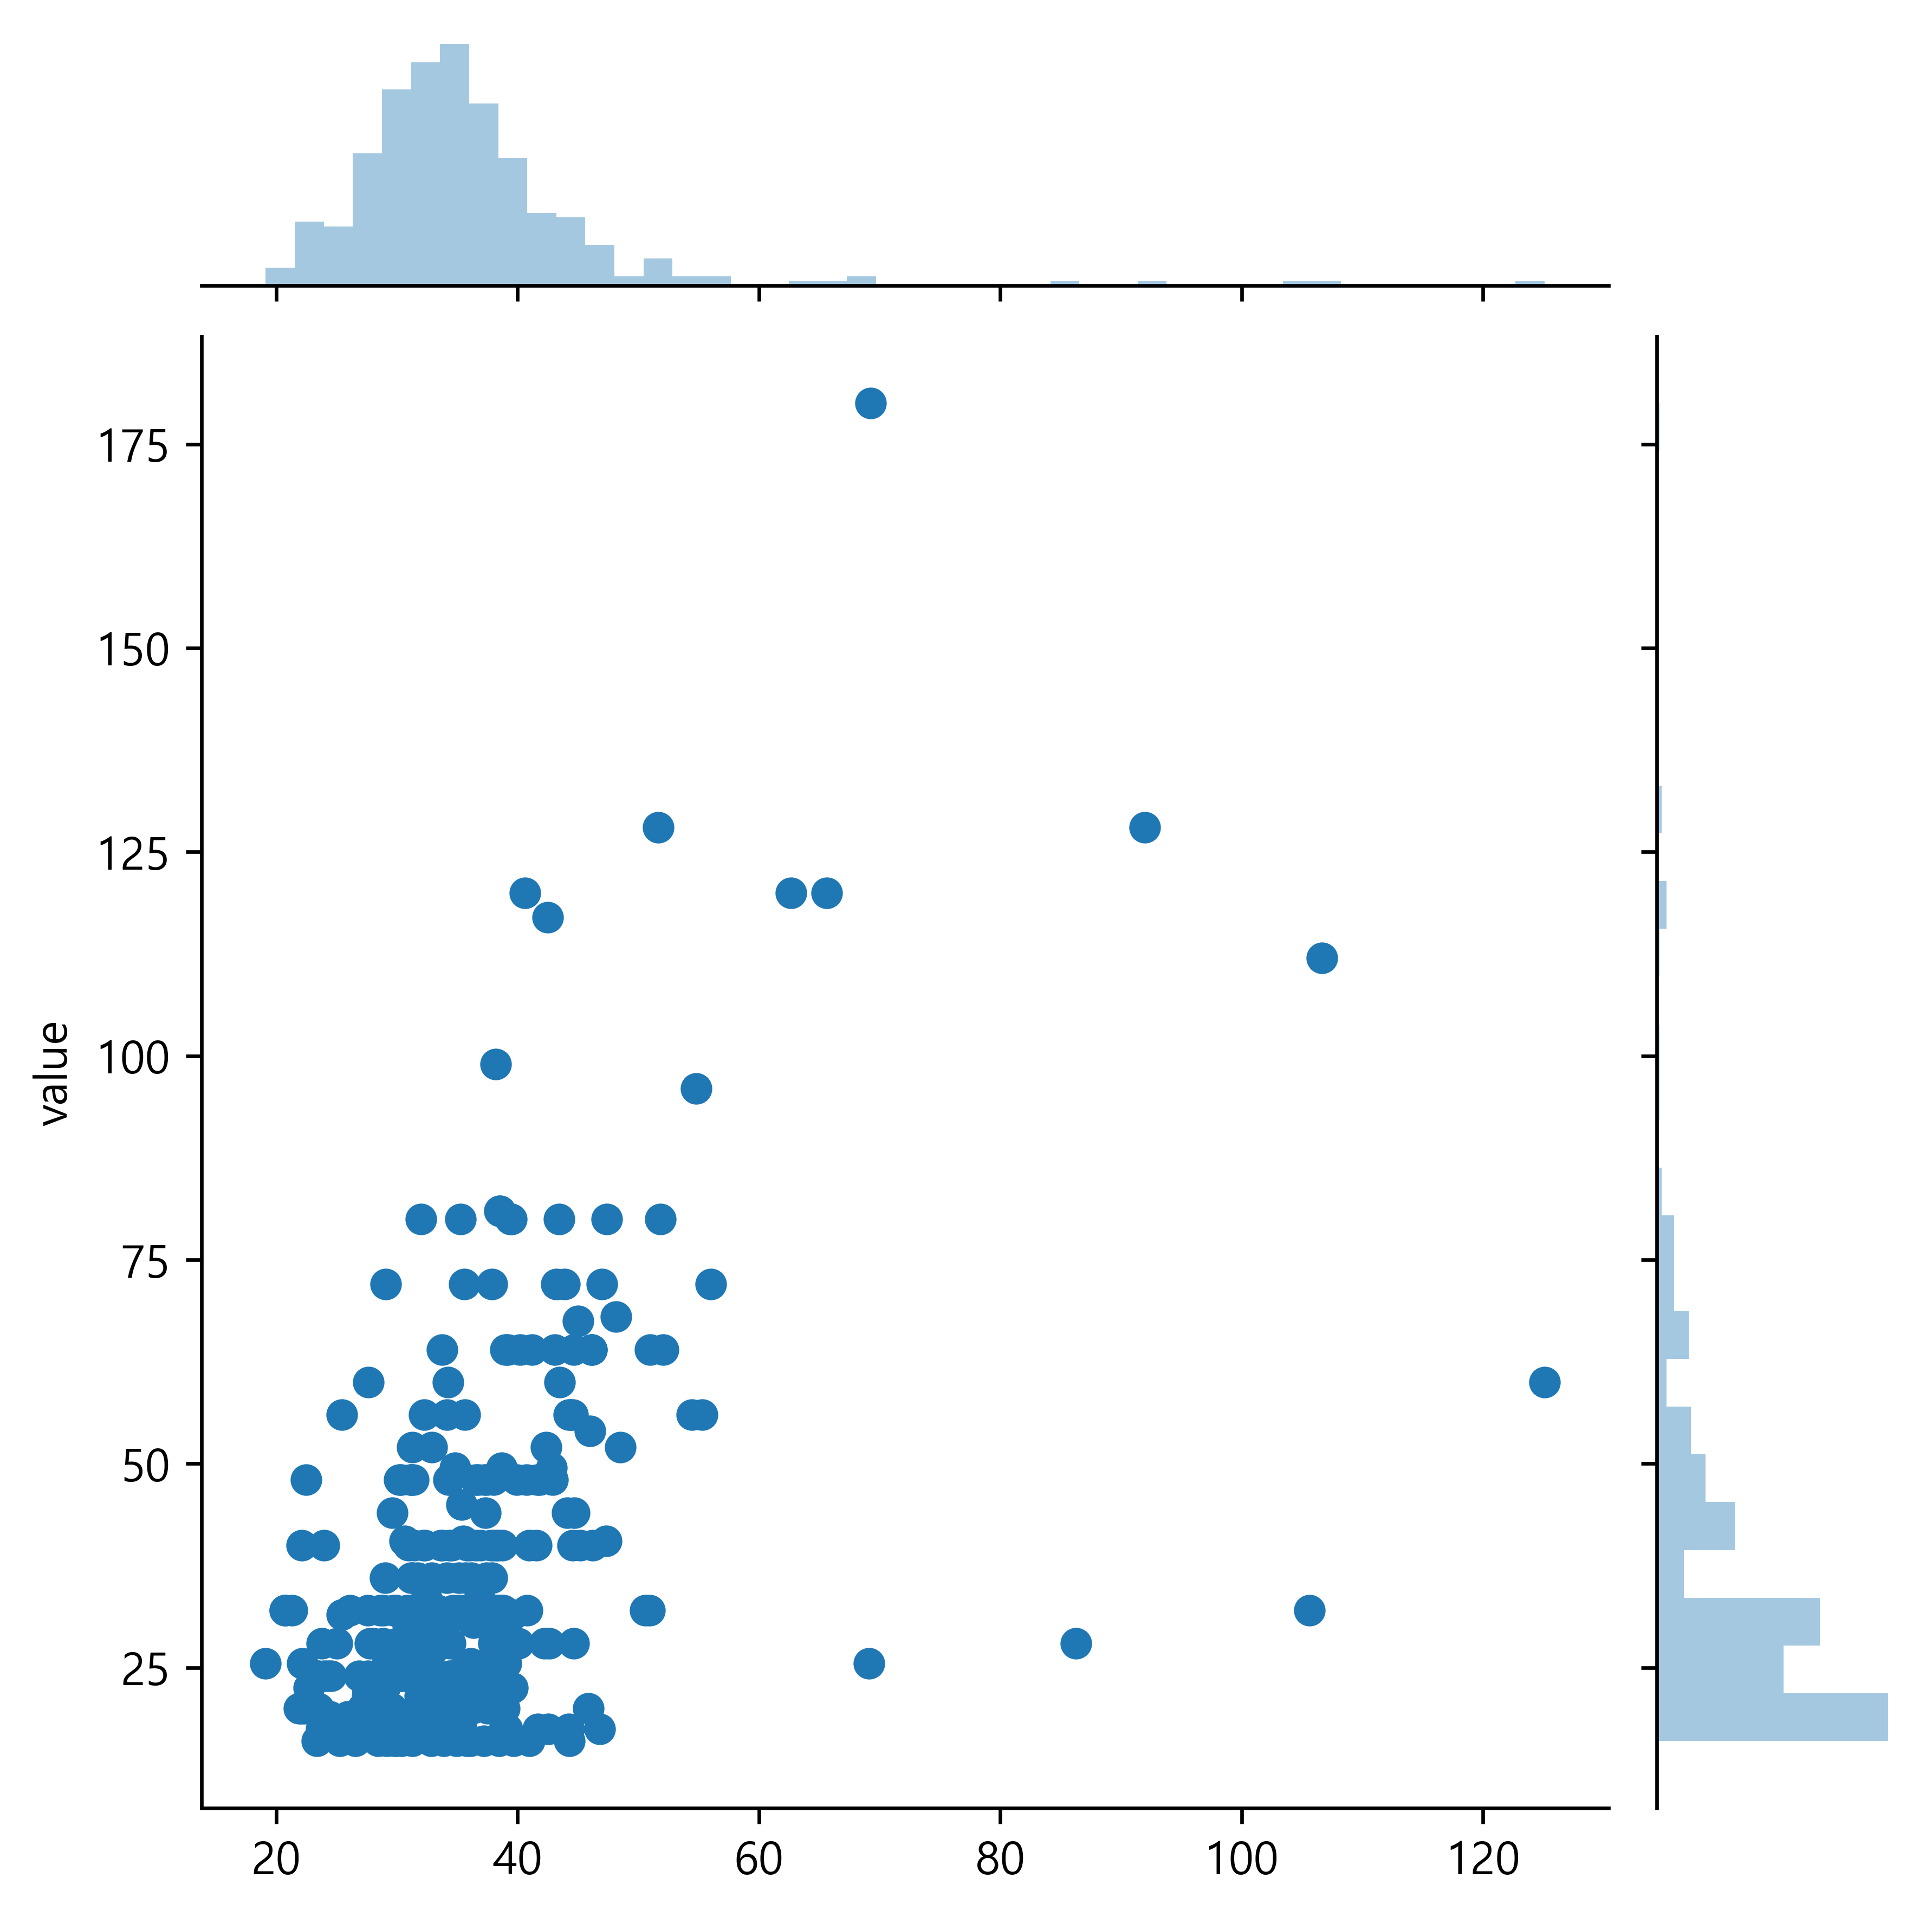

In [54]:
sns.jointplot(result.fittedvalues, df_train.value)
plt.show()

# 검증 1차

In [55]:
from sklearn.model_selection import KFold

scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df_out_20)):
    df_train = df_out_20.iloc[idx_train]
    df_test = df_out_20.iloc[idx_test]
    
    model = sm.OLS.from_formula("value ~ scale(age) + scale(follower) + scale(passes_accuracy) + \
                                scale(games_played) + scale(shotsOnTotal_goalsTotal)", data=df_train)
    result = model.fit()
    
    pred = result.predict(df_test)
    rss = ((df_test.value - pred) ** 2).sum()
    tss = ((df_test.value - df_test.value.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))

학습 R2 = 0.43588294, 검증 R2 = 0.07340391
학습 R2 = 0.37328481, 검증 R2 = 0.56745512
학습 R2 = 0.40717668, 검증 R2 = 0.16182307
학습 R2 = 0.43362456, 검증 R2 = 0.13921343
학습 R2 = 0.41324030, 검증 R2 = 0.41145860
학습 R2 = 0.41761305, 검증 R2 = 0.36993465
학습 R2 = 0.42769943, 검증 R2 = 0.18453031
학습 R2 = 0.40659942, 검증 R2 = 0.47352822
학습 R2 = 0.42082016, 검증 R2 = 0.33419352
학습 R2 = 0.41943732, 검증 R2 = 0.36001850


# 검증 2차

In [56]:
from sklearn.base import BaseEstimator, RegressorMixin
import statsmodels.formula.api as smf
import statsmodels.api as sm

class StatsmodelsOLS(BaseEstimator, RegressorMixin):
    def __init__(self, formula):
        self.formula = formula
        self.model = None
        self.data = None
        self.result = None
        
    def fit(self, dfX, dfy):
        self.data = pd.concat([dfX, dfy], axis=1)
        self.model = smf.ols(self.formula, data=self.data)
        self.result = self.model.fit()
        
    def predict(self, new_data):
        return self.result.predict(new_data)

In [57]:
from sklearn.model_selection import cross_val_score

model = StatsmodelsOLS("value ~ scale(age) + scale(follower) + scale(passes_accuracy) + \
                       scale(games_played) + scale(shotsOnTotal_goalsTotal)")
cv = KFold(10, shuffle=True, random_state=0)
cross_val_score(model, dfX, dfy, scoring="r2", cv=cv).mean()

0.3075559319985198

In [ ]:
from sklearn.model_selection import train_test_split

dfX = df_out_20.drop(['value'], axis=1)
dfy = df_out_20['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.columns)
feature_names = ["scale({})".format(name) for name in feature_names]

formula = "value ~ " + "+".join(feature_names)

model = sm.OLS.from_formula(formula, data=df_train)
result = model.fit()
print(result.summary())

##############################################################################
from sklearn.model_selection import KFold

scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df_ols)):
    df_train = df_ols.iloc[idx_train]
    df_test = df_ols.iloc[idx_test]
    
    model = sm.OLS.from_formula(formula, data=df_train)
    result = model.fit()
    
    pred = result.predict(df_test)
    rss = ((df_test.value - pred) ** 2).sum()
    tss = ((df_test.value - df_test.value.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
#    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))
print("모델 성능 : {}".format(scores.mean()))

# 아웃라이어 2차 제거

In [ ]:
from statsmodels.graphics import utils

dfX0 = df_out_20.drop('value', axis=1)
dfX = sm.add_constant(dfX0)
dfy = df_out_20['value']

model_p = sm.OLS(dfy, dfX)
result_p = model_p.fit()
pred = result_p.predict(dfX)

influence_p = result_p.get_influence()
cooks_d2, pvals = influence_p.cooks_distance
K = influence_p.k_vars
fox_cr = 4 / (len(dfy) - K - 1)
idx = np.where(cooks_d2 > fox_cr)[0]

ax = plt.subplot()
plt.scatter(dfy, pred)
plt.scatter(dfy[idx], pred[idx], s=300, c="r", alpha=0.5)
utils.annotate_axes(range(len(idx)), idx, list(zip(dfy[idx], pred[idx])), [(-20, 15)] * len(idx), size="small", ax=ax)
plt.title("아웃라이어")
plt.show()
print(idx)

In [ ]:
idx2 = list(set(range(len(dfX))).difference(idx))
len(idx2)

In [ ]:
df_out2 = df_out_20.iloc[idx2].reset_index(drop=True)
df_out2

In [ ]:
from sklearn.model_selection import train_test_split

dfX = df_out2.drop(['value'], axis=1)
dfy = df_out2['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.columns)
feature_names = ["scale({})".format(name) for name in feature_names]

model = sm.OLS.from_formula("value ~ " + "+".join(feature_names), data=df_train)
result = model.fit()
print(result.summary())

In [ ]:
pred = result.predict(df_test)

rss = ((df_test.value - pred) ** 2).sum()
tss = ((df_test.value - df_test.value.mean()) ** 2).sum()
rsquared = 1 - rss / tss
rsquared

# 검증 1차

In [ ]:
from sklearn.model_selection import KFold

scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df_out2)):
    df_train = df_out2.iloc[idx_train]
    df_test = df_out2.iloc[idx_test]
    
    model = sm.OLS.from_formula("value ~ scale(age) + scale(follower) + scale(passes_accuracy) + \
                                scale(games_played) + scale(shotsOnTotal_goalsTotal)", data=df_train)
    result = model.fit()
    
    pred = result.predict(df_test)
    rss = ((df_test.value - pred) ** 2).sum()
    tss = ((df_test.value - df_test.value.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))

# 검증 2차

In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin
import statsmodels.formula.api as smf
import statsmodels.api as sm

class StatsmodelsOLS(BaseEstimator, RegressorMixin):
    def __init__(self, formula):
        self.formula = formula
        self.model = None
        self.data = None
        self.result = None
        
    def fit(self, dfX, dfy):
        self.data = pd.concat([dfX, dfy], axis=1)
        self.model = smf.ols(self.formula, data=self.data)
        self.result = self.model.fit()
        
    def predict(self, new_data):
        return self.result.predict(new_data)

In [ ]:
from sklearn.model_selection import cross_val_score

model = StatsmodelsOLS("value ~ scale(age) + scale(follower) + scale(passes_accuracy) + \
                       scale(games_played) + scale(shotsOnTotal_goalsTotal)")
cv = KFold(10, shuffle=True, random_state=0)
cross_val_score(model, dfX, dfy, scoring="r2", cv=cv).mean()

# Data 가중 - 20200622

In [94]:
from sklearn.model_selection import train_test_split

dfX = df_out_15.drop(['value'], axis=1)
dfy = df_out_15['value']
df = pd.concat([dfX, dfy], axis=1)
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

feature_names = list(dfX.columns)
feature_names = ["scale({})".format(name) for name in feature_names]

formula = "value ~ scale(age) + scale(I(age**2)) + scale(I(age**3)) + \
            scale(follower) + scale(I(follower**2)) +\
            scale(passes_total) + scale(I(passes_total**2)) +\
            scale(passes_accuracy) + \
            scale(fouls_drawn) + \
            scale(games_lineups) + \
            scale(games_played) + \
            scale(shotsOnTotal_goalsTotal) + \
            scale(dribblesAtmptsSuc) + \
            scale(gamesApperance_sub)"

model = sm.OLS.from_formula(formula, data=df_train)
result = model.fit()
print(result.summary())

##############################################################################
from sklearn.model_selection import KFold

scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df_ols)):
    df_train = df_ols.iloc[idx_train]
    df_test = df_ols.iloc[idx_test]
    
    model = sm.OLS.from_formula(formula, data=df_train)
    result = model.fit()
    
    pred = result.predict(df_test)
    rss = ((df_test.value - pred) ** 2).sum()
    tss = ((df_test.value - df_test.value.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
#    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))
print("모델 성능 : {}".format(scores.mean()))

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     13.79
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           1.36e-23
Time:                        18:55:05   Log-Likelihood:                -942.83
No. Observations:                 245   AIC:                             1916.
Df Residuals:                     230   BIC:                             1968.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   